In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Converting csv file to dataframe
dfmta = pd.read_csv(r"C:\Users\luguzman\Downloads\MTA_Subway_Trains_Delayed__Beginning_2020_20240522.csv")

In [3]:
#Exploring first 5 rows of data
dfmta.head()

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-04,A DIVISION,1,1,Crew Availability,Crew Availability,49
1,2024-04,A DIVISION,1,1,External Factors,External Debris on Roadbed,64
2,2024-04,A DIVISION,1,1,External Factors,Inclement Weather,11
3,2024-04,A DIVISION,1,1,Infrastructure & Equipment,Braking,21
4,2024-04,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,61


In [4]:
#Reviewing datatype and number of rows/columns
dfmta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35501 entries, 0 to 35500
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               35501 non-null  object
 1   division            35501 non-null  object
 2   line                35501 non-null  object
 3   day_type            35501 non-null  int64 
 4   reporting_category  35501 non-null  object
 5   subcategory         33415 non-null  object
 6   delays              35501 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.9+ MB


In [5]:
#Changing datatype to string and numeric 
dfmta['month'] = dfmta['month'].astype('string')
dfmta['division'] = dfmta['division'].astype('string')
dfmta['line'] = dfmta['line'].astype('string')
dfmta['division'] = dfmta['division'].astype('string')
dfmta['reporting_category'] = dfmta['reporting_category'].astype('string')
dfmta['subcategory'] = dfmta['subcategory'].astype('string')

In [6]:
#Verifying datatype was changed
dfmta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35501 entries, 0 to 35500
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               35501 non-null  string
 1   division            35501 non-null  string
 2   line                35501 non-null  string
 3   day_type            35501 non-null  int64 
 4   reporting_category  35501 non-null  string
 5   subcategory         33415 non-null  string
 6   delays              35501 non-null  int64 
dtypes: int64(2), string(5)
memory usage: 1.9 MB


In [7]:
#Dropping null values
dfmta.dropna()

,month,division,line,day_type,reporting_category,subcategory,delays
0,2024-04,A DIVISION,1,1,Crew Availability,Crew Availability,49
1,2024-04,A DIVISION,1,1,External Factors,External Debris on Roadbed,64
2,2024-04,A DIVISION,1,1,External Factors,Inclement Weather,11
3,2024-04,A DIVISION,1,1,Infrastructure & Equipment,Braking,21
4,2024-04,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,61
...,...,...,...,...,...,...,...
35496,2020-01,Systemwide,Systemwide,2,External Factors,Systemwide,348
35497,2020-01,Systemwide,Systemwide,2,Infrastructure & Equipment,Systemwide,1480
35498,2020-01,Systemwide,Systemwide,2,Operating Conditions,Systemwide,1557
35499,2020-01,Systemwide,Systemwide,2,Planned ROW Work,Systemwide,1938


In [8]:
#Splitting "date" column into "month" and "year"
dfmta[['year','month']] = dfmta['month'].str.split('-',expand=True,n=2)

In [9]:
dfmta.head()

,month,division,line,day_type,reporting_category,subcategory,delays,year
0,04,A DIVISION,1,1,Crew Availability,Crew Availability,49,2024
1,04,A DIVISION,1,1,External Factors,External Debris on Roadbed,64,2024
2,04,A DIVISION,1,1,External Factors,Inclement Weather,11,2024
3,04,A DIVISION,1,1,Infrastructure & Equipment,Braking,21,2024
4,04,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,61,2024


In [10]:
#Moving "year" column to the second place 
column_to_move = dfmta.pop("year")

dfmta.insert(1, "year",column_to_move )

In [11]:
dfmta.head()

,month,year,division,line,day_type,reporting_category,subcategory,delays
0,04,2024,A DIVISION,1,1,Crew Availability,Crew Availability,49
1,04,2024,A DIVISION,1,1,External Factors,External Debris on Roadbed,64
2,04,2024,A DIVISION,1,1,External Factors,Inclement Weather,11
3,04,2024,A DIVISION,1,1,Infrastructure & Equipment,Braking,21
4,04,2024,A DIVISION,1,1,Infrastructure & Equipment,Door-Related,61


In [12]:
#Removing the word "DIVISION" from the column "division"
dfmta['division'] = dfmta['division'].str.replace('DIVISION', '')
dfmta.head()

,month,year,division,line,day_type,reporting_category,subcategory,delays
0,04,2024,A,1,1,Crew Availability,Crew Availability,49
1,04,2024,A,1,1,External Factors,External Debris on Roadbed,64
2,04,2024,A,1,1,External Factors,Inclement Weather,11
3,04,2024,A,1,1,Infrastructure & Equipment,Braking,21
4,04,2024,A,1,1,Infrastructure & Equipment,Door-Related,61


In [13]:
#Delays per year 
df_delays_peryear = dfmta.groupby(['year'])['delays'].sum()

In [14]:
df_delays_peryear = pd.DataFrame(data= df_delays_peryear, columns = ['delays'])
df_delays_peryear

,delays
year,
2020,538334
2021,787666
2022,996894
2023,898756
2024,345490


In [15]:
#Delays per month and year

df_delays_permonthyear = dfmta.groupby(['year', 'month'])['delays'].sum()
df_delays_permonthyear = pd.DataFrame(data= df_delays_permonthyear, columns = ['delays'])
df_delays_permonthyear

delays
year month        
2020 01      74358
     02      67712
     03      43024
     04      24860
     05      18518
     06      30994
     07      44232
     08      47540
     09      46174
     10      44514
     11      44034
     12      52374
2021 01      45204
     02      56278
     03      47306
     04      41756
     05      56954
     06      74292
     07      71982
     08      76218
     09      79928
     10      76674
     11      74246
     12      86828
2022 01      80900
     02      78140
     03      85148
     04      80230
     05      84118
     06      84470
     07      92896
     08      83780
     09      81598
     10      88844
     11      78220
     12      78550
2023 01      64926
     02      62950
     03      75398
     04      65818
     05      78524
     06      71592
     07      76184
     08      73586
     09      84042
     10      81964
     11      76732
     12      87040
2024 01      91848
     02      86532
     03      84340
     04      82770

In [16]:
#Delays per month 
df_delays_permonth = dfmta.groupby(['month'])['delays'].sum()
df_delays_permonth = pd.DataFrame(data= df_delays_permonth, columns = ['delays'])
df_delays_permonth

,delays
month,
01,357236
02,351612
03,335216
04,295434
05,238114
06,261348
07,285294
08,281124
09,291742


In [17]:
#Delays per line 
df_delays_perline = dfmta.groupby(['line'])['delays'].sum()
df_delays_perline = pd.DataFrame(data= df_delays_perline, columns = ['delays'])
df_delays_perline

,delays
line,
1,88677
2,115925
3,61995
4,94224
5,69149
6,126336
7,75451
A,143127
B,51078


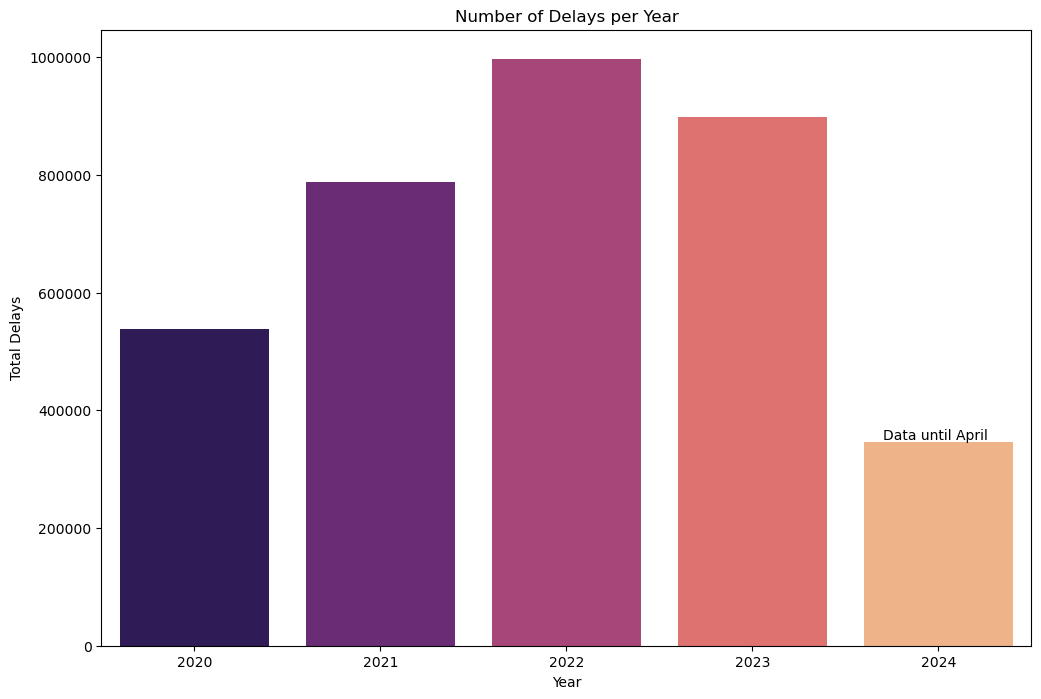

In [18]:
#Total delays per year plot bar
plt.figure(figsize=(12,8))
sns.barplot(x= df_delays_peryear.index, y='delays', data= df_delays_peryear, palette='magma')
plt.ticklabel_format(style='plain', axis='y')
plt.annotate('Data until April', xy=(3.7, 350000))
plt.title('Number of Delays per Year')
plt.xlabel('Year')
plt.ylabel('Total Delays');

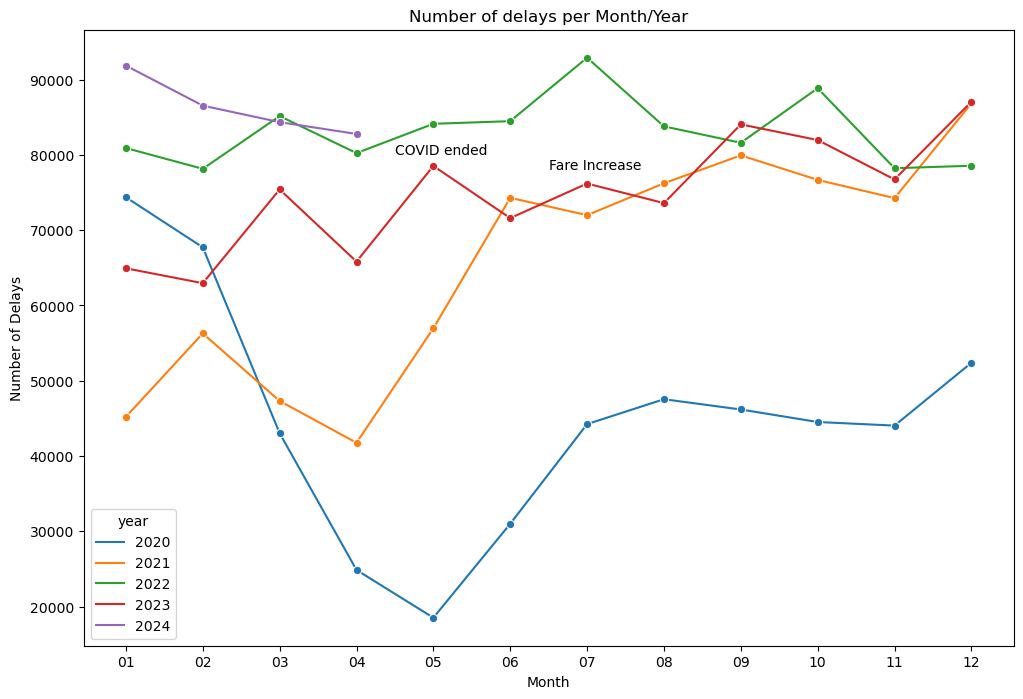

In [19]:
#Delays per month/year line plot

plt.figure(figsize=(12,8))
sns.lineplot(x='month', y='delays', data= df_delays_permonthyear, hue='year', marker= 'o')
plt.title('Number of delays per Month/Year')
plt.xlabel('Month')
plt.ylabel("Number of Delays")
plt.text(5.50,78000,"Fare Increase")
plt.text(3.5,80000,"COVID ended");

In [20]:
#Delays by reporting category 
df_delays_percategory = dfmta.groupby(['reporting_category'])['delays'].sum()
df_delays_percategory = pd.DataFrame(data= df_delays_percategory, columns = ['delays'])
df_delays_percategory

,delays
reporting_category,
Crew Availability,643370
External Factors,105614
Infrastructure & Equipment,917250
Operating Conditions,564220
Planned ROW Work,659192
Police & Medical,677494


# Conclusion (Please see Tableau Dashboard for more visualizations) 
2022 has been the year with most delays so far, however, 2024 is trending higher than other years.External factors as the end of the COVID-19 pandemic did not impact directly the increase in delays, there is a slightly decrease after the announcement of the pandemic end. 

Fare increase did not contribute to the decrease of delays, as a matter of fact, there has been spikes of increases after the price was up to $2.90 making the beginning of year 2024 the year with the highest number of delays in the last 5 years. 

There are internal and external causes of trains delays in NYC, the external causes are mainly provoked by people, and sometimes an internal cause is partly derived from an external such as subways maintenance. It is a responsibility of everyone to keep these transportation running. If you see something, say something! 

